<a href="https://colab.research.google.com/github/borrowedbirch05/Fast.AI/blob/main/xray_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp ../../kaggle.json ~/.kaggle/

In [ ]:
! pip install -q kaggle
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("chest-xray-pneumonia.zip","r") as zip_ref:
    zip_ref.extractall("dataset")


In [ ]:
from fastbook import *

In [ ]:
path = Path('.')
Path.BASE_PATH = path

In [ ]:
(path/'dataset').ls()

(#1) [Path('dataset/chest_xray')]

In [ ]:
imgs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = imgs.dataloaders(path/'dataset/chest_xray')

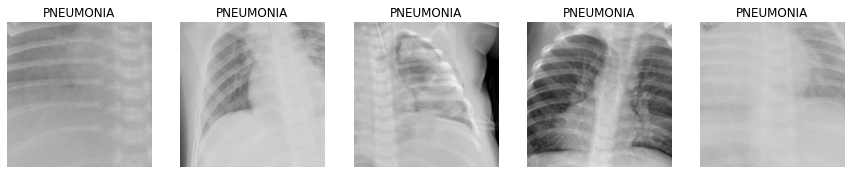

In [ ]:
dls.show_batch(nrows=1, ncols=5)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

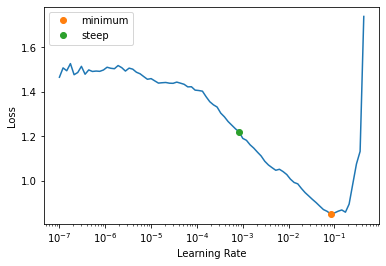

In [ ]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.286400,0.308041,0.913462,01:49
1,0.153149,0.290405,0.908654,01:40
2,0.137133,0.281132,0.915064,01:37


In [ ]:
learn.unfreeze()

SuggestedLRs(valley=2.75422871709452e-06)

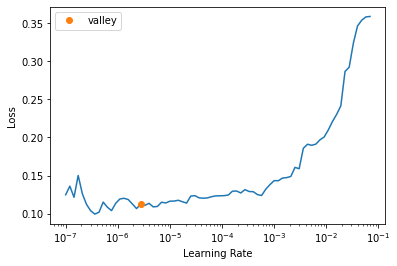

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=2e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.127922,0.270476,0.915064,02:01
1,0.108747,0.270897,0.916667,01:46
2,0.105500,0.261780,0.923077,01:43
3,0.096354,0.263251,0.919872,01:42
4,0.096033,0.252348,0.926282,01:43
5,0.088697,0.255142,0.924679,01:46
6,0.088543,0.246591,0.924679,01:43
7,0.088386,0.264430,0.921474,01:46
8,0.096758,0.237048,0.924679,01:47
9,0.085139,0.252283,0.923077,01:44
